# Image Palette Reducer - Pixel substitution for limited choice coloring
* ### author: Mowibox (Ousmane THIONGANE)
* ### brief: Image simplification by replacing each pixel with the closest color from a predefined set
* ### date: 24/12/2024


## Imports

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## I - Available colors

The (R, G, B) values of the restricted set of colors available are stored in a dictionary:

In [12]:
color_set = {
    "Red": (255, 0, 40),
    "Orange": (255, 128, 0),
    "Yellow": (255, 255, 60),
    "Green": (33, 179, 44),
    "Blue": (0, 90, 213),
    "Purple": (69, 40, 159),
    "Pink": (222, 24, 143),
    "Gold": (188, 165, 84),
    "Silver": (150, 150, 150),
    "White": (255, 255, 255),
    "Black": (0, 0, 0),
}

## Loading an image

In [13]:
def load_img(path: str, size: tuple[int, int]=None) -> np.ndarray:
    """
    Loads an image and resizes it if specified

    @param path: The image filepath
    @param size: The size of the resized image (w, h)
    """
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if size is not None:
        img = cv2.resize(img, size) 
    return img


def display_img(img: np.ndarray, img2: np.ndarray = None, grid: bool = False) -> None:
    """
    Displays one or two images on a plot, optionally with a grid overlay.

    @param img: The first input image
    @param img2: The second image (optional)
    @param grid: Displays a grid if True
    """
    n_cols = 2 if img2 is not None else 1
    
    fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 6))
    if n_cols == 1:
        axes = [axes]

    def plot_image(ax, img, grid):
        height, width = img.shape[:2]
        if grid:
            for x in range(width + 1):
                ax.axvline(x - 0.5, linewidth=0.5)
            for y in range(height + 1):
                ax.axhline(y - 0.5, linewidth=0.5)
        ax.imshow(img)

    plot_image(axes[0], img, grid)

    if img2 is not None:
        plot_image(axes[1], img2, grid)

    plt.tight_layout()
    plt.show()
    

Note: The grid parameter can bu useful for small images (e.g. 32x32). The image can be resized using the size parameter of the `load_img` function.

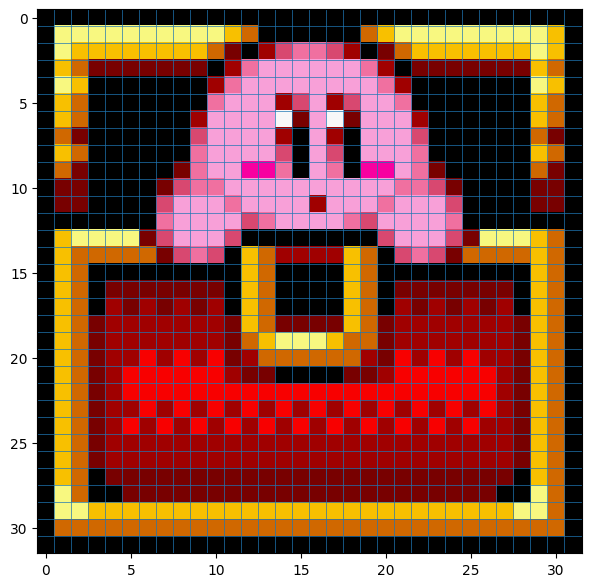

In [14]:
img = load_img('img/kirby.png', size=(32,32)) # I love Kirby!
display_img(img, grid=True)

## Search for the closest colors


To find out which image color is closest to our color set, we calculate the distance between the image pixel's color and each predefined color in the set. Noting $p_1$ as a pixel in the image, we look for a RBG tuple $p_2$ in our color set $P$ that minimizes the distance between the two pixels. The distance metric used is the Manhattan distance:

$$d_{M}(p_1, p_2)=|p_1(0)-p_2(0)|+|p_1(1)-p_2(1)|+|p_1(2)-p_2(2)|$$

$$p_{new} = \min_{p_2 \in P}(d_{M}(p_1, p_2))$$

The color with the smallest distance is chosen as the closest match and replaces the original pixel's color in the image. This process is repeated for all pixels in the image to create a simplified version with a limited palette.

In [15]:
def manhattan_distance(p1: tuple, p2: tuple) -> int:
    """
    Computes the Manhattan distance between two pixels in RGB space

    @param p1: The first pixel
    @param p2: The second pixel
    """
    if len(p1) != 3 or len(p2) != 3:
        raise ValueError("Both pixels must be tuples of length 3 in RGB format!")
    
    d = abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) + abs(p1[2] - p2[2])
    return d

In [16]:
def closest_color(p: tuple, color_lst: dict) -> tuple:
    """
    Find the closest color for a given pixel from a color list
    @param p: The input pixel
    @param color_lst: The color list 
    """
    p_new = None
    min_d = float('inf')
    
    for color_name, p2  in color_lst.items():
        d = manhattan_distance(p, p2)
        if d < min_d:
            min_d = d
            p_new = p2
    
    return p_new

## Image recoloring

Using the logic implemented in the previous section, we create a new image with the replaced colors:

In [17]:

def recolor_image(img: np.ndarray, color_lst: dict) -> np.ndarray:
    """
    Recolor an image by assigning to each pixel the closest color from a color list
    using Manhattan distance

    @param img: The input image
    @param color_lst: The color lst
    """
    recolored = np.zeros_like(img) 
    h, w, _ = img.shape

    for i in range(h):
        for j in range(w):
            pixel = img[i, j]  
            recolored[i, j] = closest_color(tuple(pixel), color_lst)
    
    return recolored


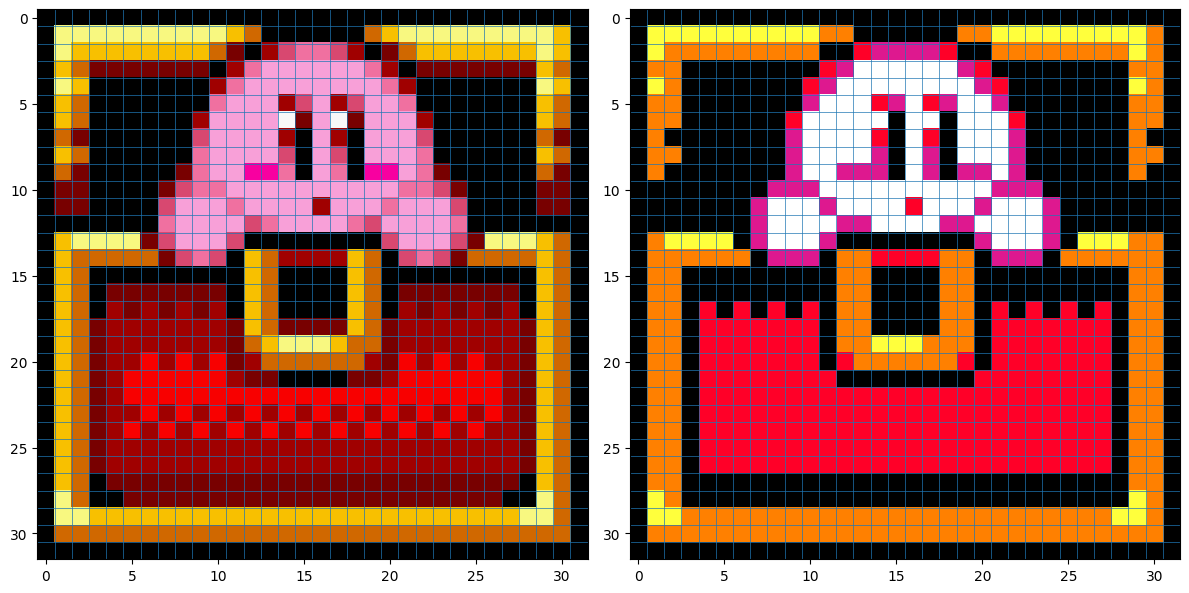

In [18]:
img_new = recolor_image(img=img, color_lst=color_set)

display_img(img, img_new, grid=True)

## Other examples

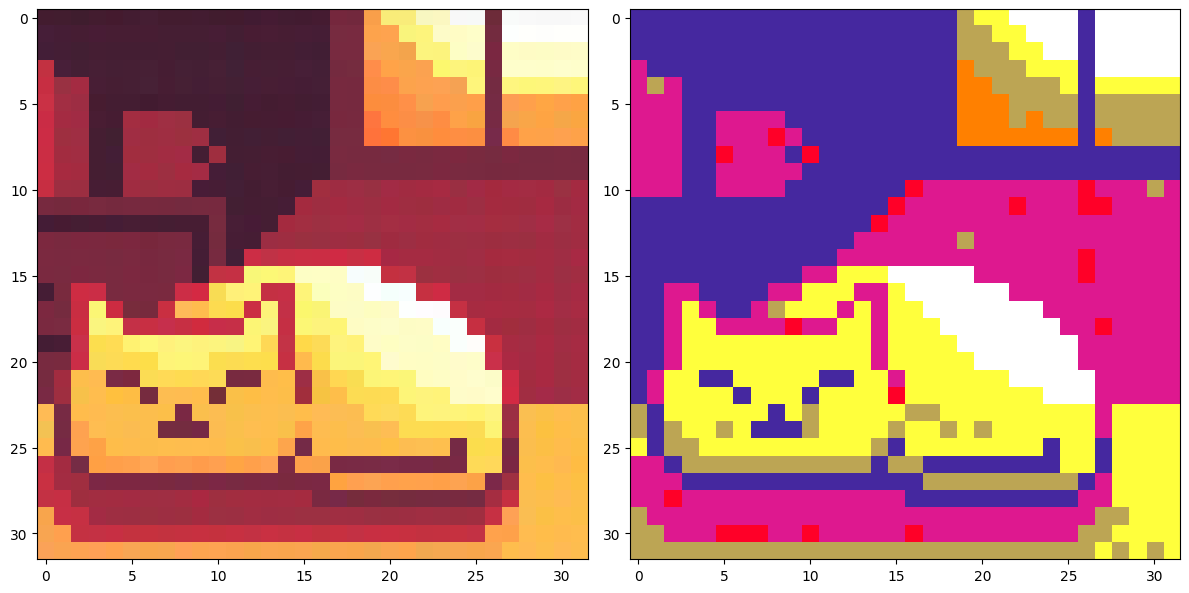

In [19]:
img2 = load_img('img/cat.jpg', size=(32,32))
img2_new = recolor_image(img2, color_lst=color_set)

display_img(img2, img2_new)

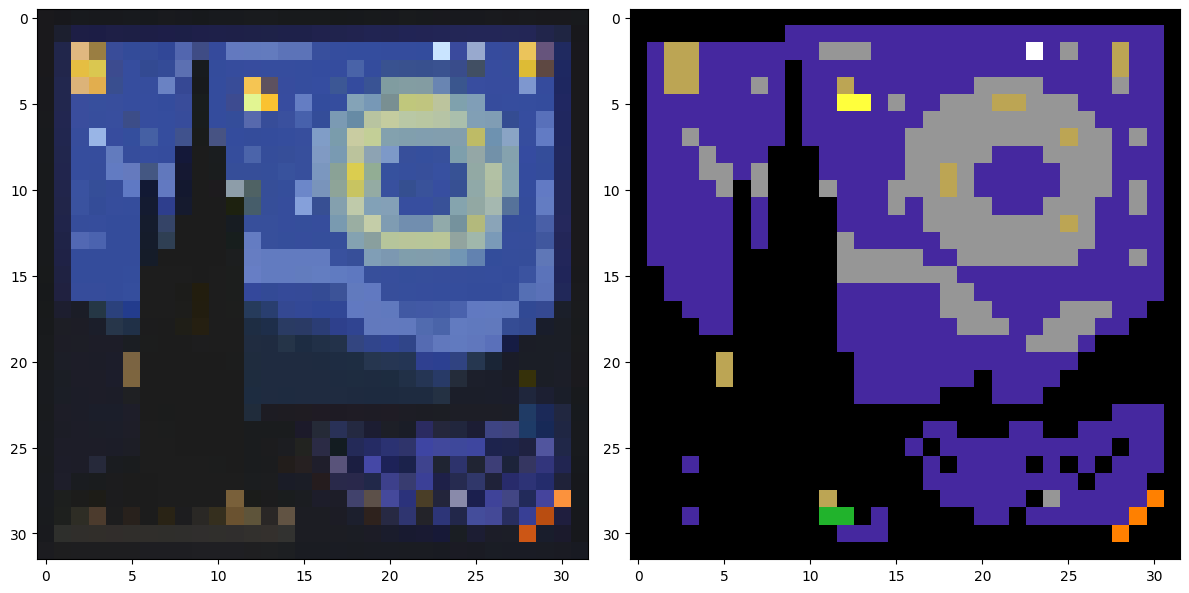

In [35]:
img3 = load_img('img/starry_night.png', size=(32,32))
img3_new = recolor_image(img3, color_lst=color_set)

display_img(img3, img3_new)

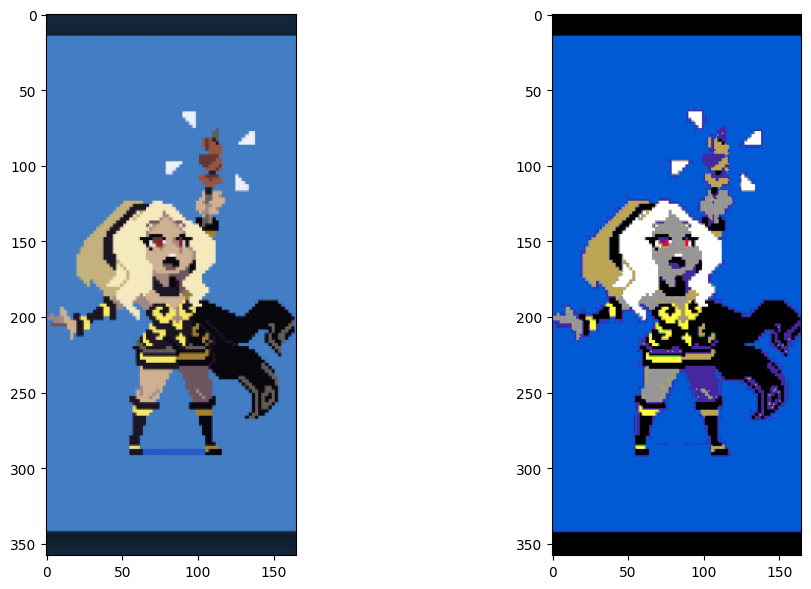

In [36]:
img4 = load_img('img/kat.jpg', size=(828//5,1792//5))
img4_new = recolor_image(img4, color_lst=color_set)

display_img(img4, img4_new)